In [ ]:
#

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import re

In [ ]:
pd.set_option("display.max_colwidth",2)
df = pd.read_json("/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset_v2.json",lines=True)
df.head(5)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546


In [ ]:
df.shape

(28619, 3)

In [ ]:
df['article_link'].map(lambda x: re.findall(r'\w*',x)[6])

0        theonion      
1        huffingtonpost
2        huffingtonpost
3        theonion      
4        theonion      
           ...         
28614    theonion      
28615    theonion      
28616    huffingtonpost
28617    theonion      
28618    theonion      
Name: article_link, Length: 28619, dtype: object

In [ ]:
df['news_article'] = df['article_link'].map(lambda x: re.findall(r'\w*',x)[6])

In [ ]:
df['len_of_sentence'] = df['headline'].map(lambda x: len(x.split(" ")))

In [ ]:
df.head(10)

,is_sarcastic,headline,article_link,news_article,len_of_sentence
0,1,thirtysomething scientists unveil doomsday clock of hair loss,https://www.theonion.com/thirtysomething-scientists-unveil-doomsday-clock-of-hai-1819586205,theonion,8
1,0,"dem rep. totally nails why congress is falling short on gender, racial equality",https://www.huffingtonpost.com/entry/donna-edwards-inequality_us_57455f7fe4b055bb1170b207,huffingtonpost,13
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html,huffingtonpost,7
3,1,inclement weather prevents liar from getting to work,https://local.theonion.com/inclement-weather-prevents-liar-from-getting-to-work-1819576031,theonion,8
4,1,mother comes pretty close to using word 'streaming' correctly,https://www.theonion.com/mother-comes-pretty-close-to-using-word-streaming-cor-1819575546,theonion,9
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-inheritance_us_59230747e4b07617ae4cbe1a,huffingtonpost,3
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to-file-your-taxes_b_6957316.html,huffingtonpost,9
7,1,richard branson's global-warming donation nearly as much as cost of failed balloon trips,https://www.theonion.com/richard-bransons-global-warming-donation-nearly-as-much-1819568749,theonion,13
8,1,shadow government getting too large to meet in marriott conference room b,https://politics.theonion.com/shadow-government-getting-too-large-to-meet-in-marriott-1819570731,theonion,12
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,huffingtonpost,6


In [ ]:
[df['len_of_sentence'].max(),df['len_of_sentence'].min()]

[151, 2]

In [ ]:
df.describe()

,is_sarcastic,len_of_sentence
count,28619.000000,28619.000000
mean,0.476397,10.051854
std,0.499451,3.390939
min,0.000000,2.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,1.000000,12.000000
max,1.000000,151.000000


In [ ]:
pd.concat([df.loc[(df['len_of_sentence']==2)].head(5), df.loc[(df['len_of_sentence']==2)].tail(5)])

,is_sarcastic,headline,article_link,news_article,len_of_sentence
269,0,trump's tailspin,https://www.huffingtonpost.com/entry/trumps-tailspin_us_5994d1e3e4b055243ea135a6,huffingtonpost,2
489,0,sunday roundup,https://www.huffingtonpost.com/entry/sunday-roundup_395_b_7678280.html,huffingtonpost,2
859,1,life unfair,https://www.theonion.com/life-unfair-1819564293,theonion,2
1168,1,cher back,https://entertainment.theonion.com/cher-back-1819590091,theonion,2
1225,0,clean machine,https://www.huffingtonpost.com/entry/clean-machine_b_5794080.html,huffingtonpost,2
27565,0,celebrating christmas,https://www.huffingtonpost.com/entry/celebrating-christmas_b_6319622.html,huffingtonpost,2
27935,0,sunday roundup,https://www.huffingtonpost.com/entry/sunday-roundup_371_b_6493814.html,huffingtonpost,2
28094,1,chaps unnecessary,https://www.theonion.com/chaps-unnecessary-1819587419,theonion,2
28376,0,bye bye,https://www.huffingtonpost.com/entry/bye-bye_b_7251394.html,huffingtonpost,2
28571,0,refugee blues,https://www.huffingtonpost.com/entry/post_10092_b_8097064.html,huffingtonpost,2


In [ ]:
print(df[(df.news_article == 'huffingtonpost') & (df.is_sarcastic == 0)].count())
print("----------------------")
print(df[(df.news_article == 'huffingtonpost') & (df.is_sarcastic == 1)].count())
print("----------------------")
print(df[(df.news_article == 'theonion') & (df.is_sarcastic == 0)].count())
print("----------------------")
print(df[(df.news_article == 'theonion') & (df.is_sarcastic == 1)].count())

is_sarcastic       14985
headline           14985
article_link       14985
news_article       14985
len_of_sentence    14985
dtype: int64
----------------------
is_sarcastic       0
headline           0
article_link       0
news_article       0
len_of_sentence    0
dtype: int64
----------------------
is_sarcastic       0
headline           0
article_link       0
news_article       0
len_of_sentence    0
dtype: int64
----------------------
is_sarcastic       13634
headline           13634
article_link       13634
news_article       13634
len_of_sentence    13634
dtype: int64


In [ ]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

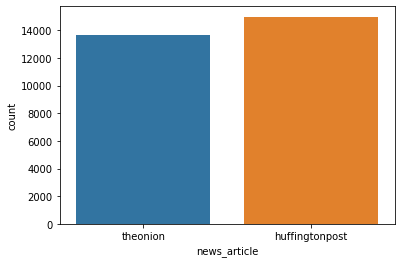

In [ ]:
sns.countplot(x='news_article',data=df)

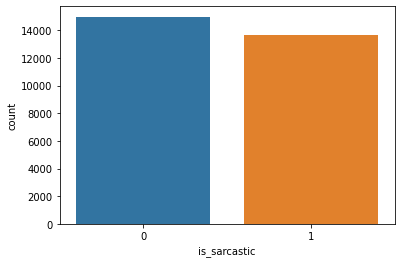

In [ ]:
sns.countplot(x = "is_sarcastic",data=df)

In [ ]:
df.dtypes

is_sarcastic       int64 
headline           object
article_link       object
news_article       object
len_of_sentence    int64 
dtype: object

In [ ]:
import string
def no_punctuation(words):
  no_punc = "".join([w for w in words if w not in string.punctuation])
  return no_punc

In [ ]:
df['headline'] = df['headline'].apply(lambda x: no_punctuation(x))
df['headline'].head(10)

0    thirtysomethingscientistsunveildoomsdayclockhairloss                
1    demreptotallynailscongressfallingshortgenderracialequality          
2    eatveggies9deliciouslydifferentrecipes                              
3    inclementweatherpreventsliargettingwork                             
4    mothercomesprettycloseusingwordstreamingcorrectly                   
5    whiteinheritance                                                    
6    5waysfiletaxeslessstress                                            
7    richardbransonsglobalwarmingdonationnearlymuchcostfailedballoontrips
8    shadowgovernmentgettinglargemeetmarriottconferenceroomb             
9    lotsparentsknowscenario                                             
Name: headline, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
df['headline'] = df['headline'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['headline'].head(10)

0    [thirtysomethingscientistsunveildoomsdayclockhairloss]                
1    [demreptotallynailscongressfallingshortgenderracialequality]          
2    [eatveggies9deliciouslydifferentrecipes]                              
3    [inclementweatherpreventsliargettingwork]                             
4    [mothercomesprettycloseusingwordstreamingcorrectly]                   
5    [whiteinheritance]                                                    
6    [5waysfiletaxeslessstress]                                            
7    [richardbransonsglobalwarmingdonationnearlymuchcostfailedballoontrips]
8    [shadowgovernmentgettinglargemeetmarriottconferenceroomb]             
9    [lotsparentsknowscenario]                                             
Name: headline, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
  no_stop_words = [w for w in text if w not in stopwords.words('english')]
  return no_stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.headline = df.headline.apply(lambda x: remove_stopwords(x))
df.headline.head(10)

0    [thirtysomethingscientistsunveildoomsdayclockhairloss]                
1    [demreptotallynailscongressfallingshortgenderracialequality]          
2    [eatveggies9deliciouslydifferentrecipes]                              
3    [inclementweatherpreventsliargettingwork]                             
4    [mothercomesprettycloseusingwordstreamingcorrectly]                   
5    [whiteinheritance]                                                    
6    [5waysfiletaxeslessstress]                                            
7    [richardbransonsglobalwarmingdonationnearlymuchcostfailedballoontrips]
8    [shadowgovernmentgettinglargemeetmarriottconferenceroomb]             
9    [lotsparentsknowscenario]                                             
Name: headline, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
  lem_text = " ".join([lemmatizer.lemmatize(word) for word in text])
  return lem_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['headline'] = df.headline.apply(lambda x : lemmatize(x))
df.headline.head(10)

0    thirtysomethingscientistsunveildoomsdayclockhairloss                
1    demreptotallynailscongressfallingshortgenderracialequality          
2    eatveggies9deliciouslydifferentrecipes                              
3    inclementweatherpreventsliargettingwork                             
4    mothercomesprettycloseusingwordstreamingcorrectly                   
5    whiteinheritance                                                    
6    5waysfiletaxeslessstress                                            
7    richardbransonsglobalwarmingdonationnearlymuchcostfailedballoontrips
8    shadowgovernmentgettinglargemeetmarriottconferenceroomb             
9    lotsparentsknowscenario                                             
Name: headline, dtype: object

In [ ]:
df['headline'].map(lambda x: re.sub('[^a-zA-Z]'," ",x)).head(10)

0    thirtysomethingscientistsunveildoomsdayclockhairloss                
1    demreptotallynailscongressfallingshortgenderracialequality          
2    eatveggies deliciouslydifferentrecipes                              
3    inclementweatherpreventsliargettingwork                             
4    mothercomesprettycloseusingwordstreamingcorrectly                   
5    whiteinheritance                                                    
6     waysfiletaxeslessstress                                            
7    richardbransonsglobalwarmingdonationnearlymuchcostfailedballoontrips
8    shadowgovernmentgettinglargemeetmarriottconferenceroomb             
9    lotsparentsknowscenario                                             
Name: headline, dtype: object

In [ ]:
df['headline'] = df.headline.map(lambda x: re.sub('[^a-zA-Z]'," ",x))

In [ ]:
df.drop(['article_link'],axis=1,inplace=True)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
max_features = 10000
maxlen = 51 #max len of each sentence
embedding_size = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = df['is_sarcastic']
word_index = tokenizer.word_index

Sequences of Sentences are padded to maintain uniformity in the length of each sentence before passing them into RNN

In [ ]:
import os

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D

Without Glove word Embeddings

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_size,input_length=maxlen))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 100)           3080900   
_________________________________________________________________
bidirectional (Bidirectional (None, 51, 256)           234496    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 40)                10280     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
179/179 [==============================] - 11s 39ms/step - loss: 0.6849 - accuracy: 0.5319 - val_loss: 0.6915 - val_accuracy: 0.5321
Epoch 2/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6834 - accuracy: 0.5319 - val_loss: 0.6932 - val_accuracy: 0.5325
Epoch 3/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6822 - accuracy: 0.5322 - val_loss: 0.6963 - val_accuracy: 0.5318
Epoch 4/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6825 - accuracy: 0.5318 - val_loss: 0.6965 - val_accuracy: 0.5321
Epoch 5/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6828 - accuracy: 0.5321 - val_loss: 0.6960 - val_accuracy: 0.5321
Epoch 6/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6829 - accuracy: 0.5312 - val_loss: 0.6937 - val_accuracy: 0.5320
Epoch 7/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6823 - accuracy: 0.5318 - val_loss: 0.6961 - val_accuracy: 0.531

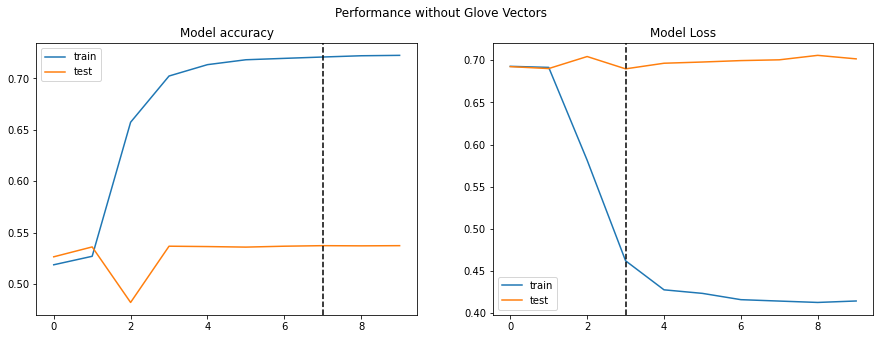

In [ ]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance without Glove Vectors")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k',linestyle="--")
ax1.set_title("Model accuracy")
ax1.legend(['train','test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k',linestyle="--")
ax2.set_title("Model Loss")
ax2.legend(['train','test'])
plt.show()

With Glove Embeddings


In [ ]:
GLOVE_DIR = '/content/drive/My Drive/Colab Notebooks/glove.6B.200d.txt'

In [ ]:
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:],dtype='float32')
  embeddings_index[word] = coefs
f.close()

print(f"Found {len(embeddings_index)} word vectors")

Found 400000 word vectors


In [ ]:
embedding_size1 = 200
embedding_matrix = np.zeros((len(word_index)+1,embedding_size1))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    #words not found in embedding index will all be zero
    embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_size1, weights=[embedding_matrix],input_length=maxlen,trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 51, 200)           6161800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 51, 256)           336896    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 40)                10280     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)               

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,validation_split=0.2,epochs=10,batch_size=128)

Epoch 1/10
179/179 [==============================] - 11s 40ms/step - loss: 0.6917 - accuracy: 0.5251 - val_loss: 0.6896 - val_accuracy: 0.5321
Epoch 2/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6900 - accuracy: 0.5264 - val_loss: 0.6887 - val_accuracy: 0.5314
Epoch 3/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6885 - accuracy: 0.5291 - val_loss: 0.6878 - val_accuracy: 0.5320
Epoch 4/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6880 - accuracy: 0.5294 - val_loss: 0.6883 - val_accuracy: 0.5311
Epoch 5/10
179/179 [==============================] - 6s 33ms/step - loss: 0.6867 - accuracy: 0.5309 - val_loss: 0.6884 - val_accuracy: 0.5321
Epoch 6/10
179/179 [==============================] - 6s 33ms/step - loss: 0.6856 - accuracy: 0.5309 - val_loss: 0.6893 - val_accuracy: 0.5318
Epoch 7/10
179/179 [==============================] - 6s 34ms/step - loss: 0.6851 - accuracy: 0.5301 - val_loss: 0.6892 - val_accuracy: 0.532

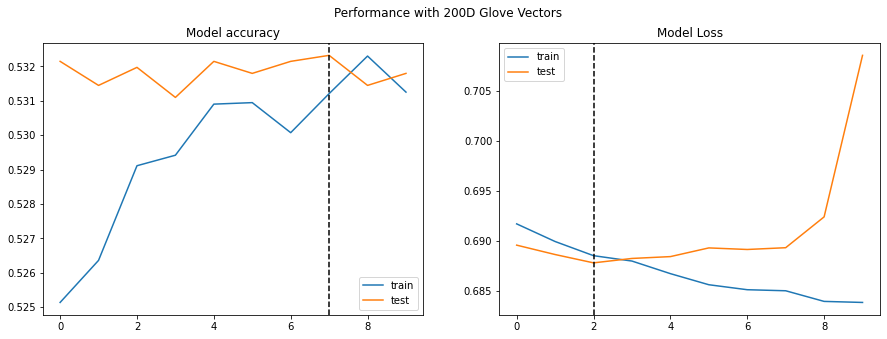

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance with 200D Glove Vectors")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k',linestyle="--")
ax1.set_title("Model accuracy")
ax1.legend(['train','test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k',linestyle="--")
ax2.set_title("Model Loss")
ax2.legend(['train','test'])
plt.show()